# Plotting routine for the Sep22 Event

In [11]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
import copy as cp

import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [12]:
t_launch = datetime.datetime(2022, 9, 5, 18, 45, tzinfo=datetime.timezone.utc) # launch time assumed at CME impact at PSP at 14.72 Rs

t_s = datetime.datetime(2022, 9, 7, 6, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 8, 5, tzinfo=datetime.timezone.utc)

start = t_s + datetime.timedelta(hours=3)

t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [13]:
t_fit

[datetime.datetime(2022, 9, 7, 9, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 15, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 7, 21, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 8, 3, 0, tzinfo=datetime.timezone.utc)]

In [14]:
path = 'output/solo06092022_heeq_512_restrP_2/'

filepath = fp.loadpickle(path, number = -1)

#### extracting parameters

In [15]:
res, allres, ind = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  183.37
INFO:py3dcore_h4c.fluxplot: --lat:  -7.01
INFO:py3dcore_h4c.fluxplot: --inc:  10.31
INFO:py3dcore_h4c.fluxplot: --dia:  0.33
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  1.31
INFO:py3dcore_h4c.fluxplot: --launch radius:  14.98
INFO:py3dcore_h4c.fluxplot: --launch speed:  1423.38
INFO:py3dcore_h4c.fluxplot: --T factor:  158.48
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  27.31
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  0.56
INFO:py3dcore_h4c.fluxplot: --sw background speed:  586.14


In [16]:
out = fp.get_ensemble_stats(filepath)

In [17]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,init speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,168.246643,-14.836386,13.900095,0.320400,2.658135,14.990875,1457.787109,173.000824,23.771347,1.161949,552.796631
std,14.477346,6.795891,8.201792,0.017755,0.984444,0.551564,253.409241,46.893925,9.997373,0.466047,63.770878
min,123.595436,-29.928215,0.013312,0.260102,1.003314,14.004333,1000.128662,51.433414,5.148705,0.230637,403.466278
25%,158.011585,-19.852520,7.189882,0.308296,1.880961,14.543706,1246.588531,140.678535,15.972214,0.791880,513.499237
50%,169.713501,-14.488335,13.051911,0.322068,2.527858,14.977819,1438.123962,177.222130,22.897486,1.176815,550.864777
75%,178.898952,-10.199073,20.638418,0.335288,3.329308,15.434000,1647.894470,212.016796,29.716475,1.569203,595.485901
max,203.128876,4.749531,29.762684,0.349965,4.991948,15.996014,1997.560303,249.972946,49.824089,1.996955,698.533081


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: solo_2022sep.p


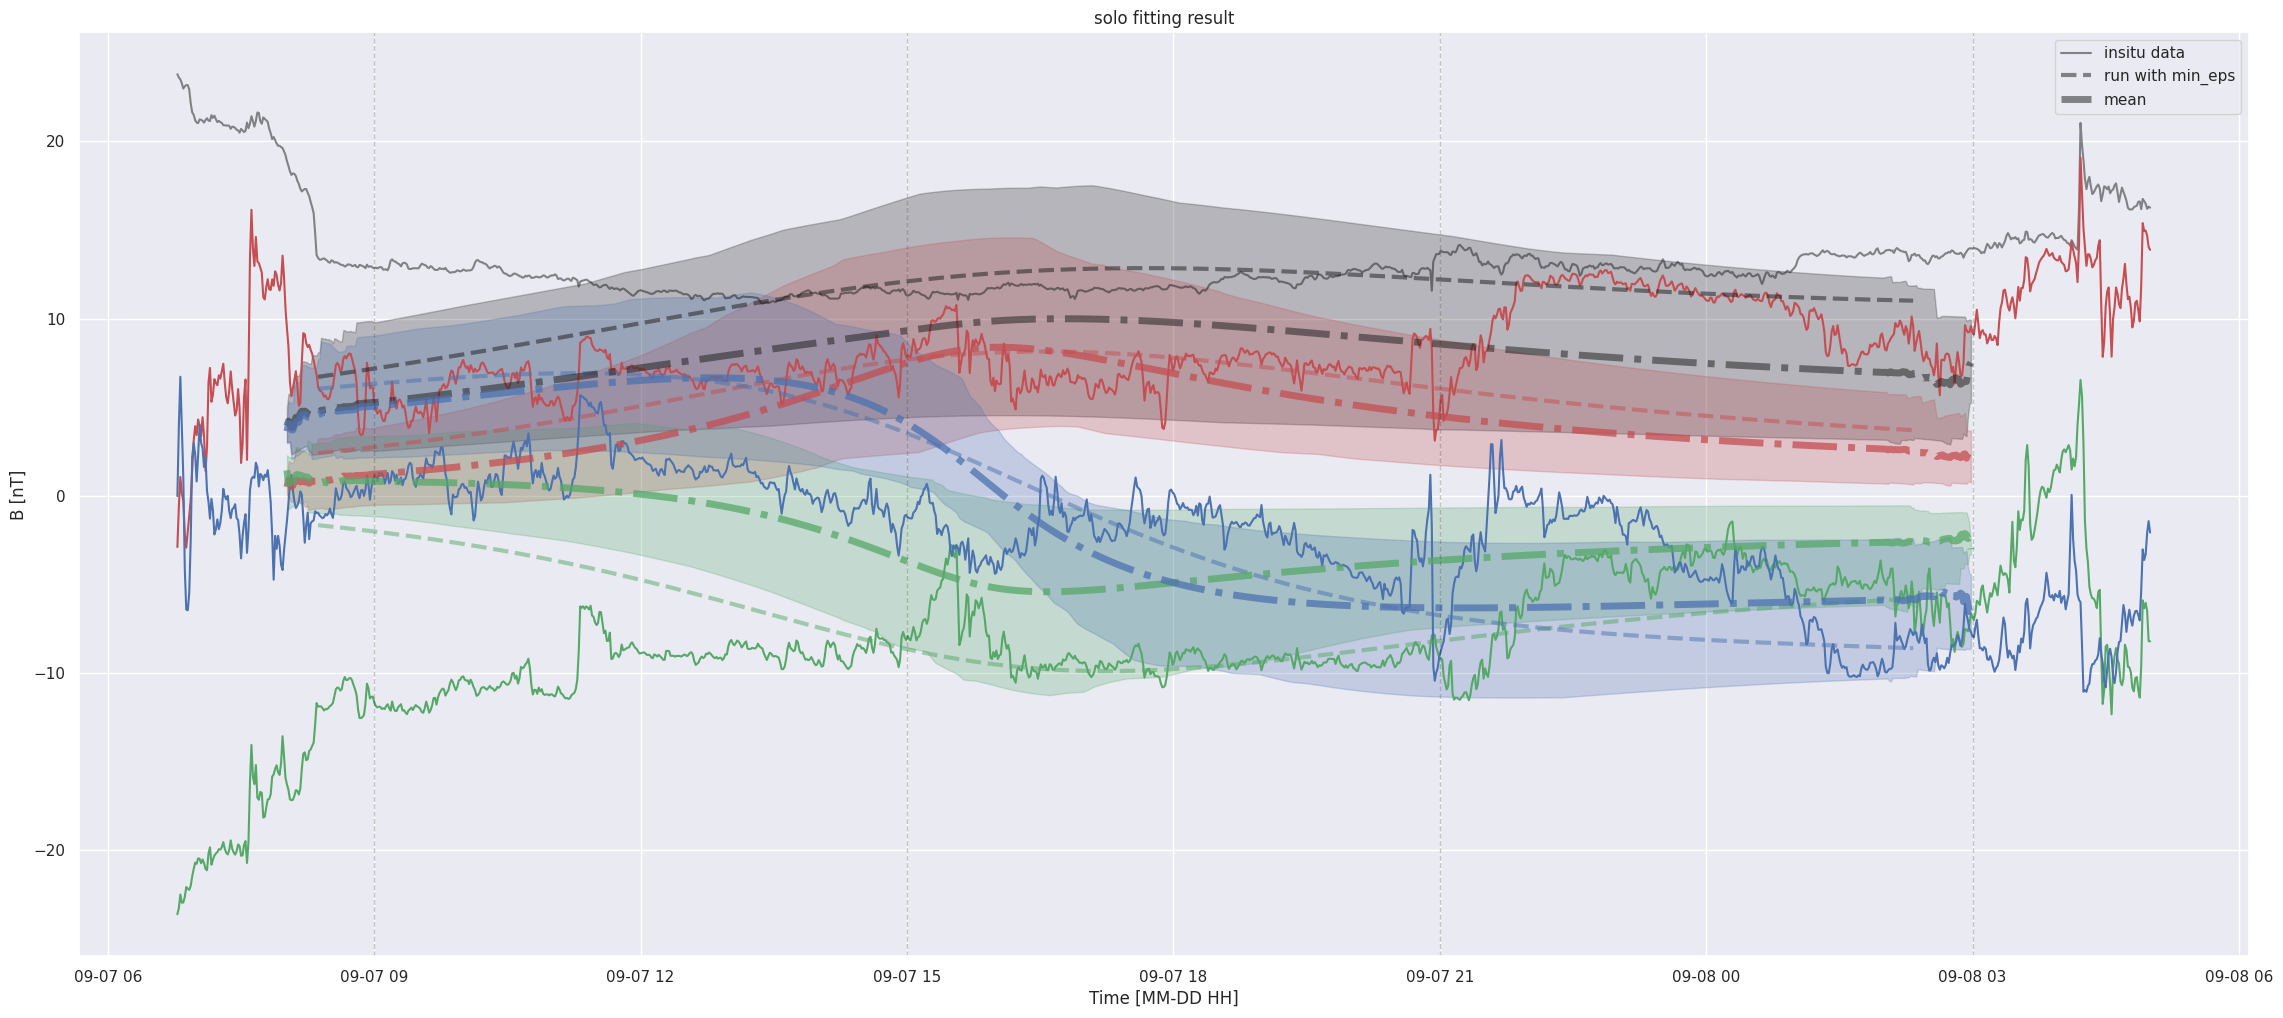

In [18]:
fp.fullinsitu(observer='solo', t_fit = t_fit, start = t_s, end = t_e, filepath = filepath, 
              custom_data = 'solo_2022sep.p', best = True, ensemble = True, mean = True, fixed = None)

In [ ]:
fp.scatterparams(filepath)

KeyboardInterrupt: 

In [18]:
n = 1#number of runs

#we initialize model for 1 run with default params

model_obj = py3dcore_h4c.ToroidalModel(t_launch, n, iparams=overwrite)

    Model Parameters
    ================
        For this specific model there are a total of 14 initial parameters which are as follows:
        0: t_i          time offset
        1: lon          longitude
        2: lat          latitude
        3: inc          inclination

        4: dia          cross section diameter at 1 AU
        5: delta        cross section aspect ratio

        6: r0           initial cme radius
        7: v0           initial cme velocity
        8: T            T factor (related to the twist)

        9: n_a          expansion rate
        10: n_b         magnetic field decay rate

        11: b           magnetic field strength at center at 1AU
        12: bg_d        solar wind background drag coefficient
        13: bg_v        solar wind background speed

        There are 4 state parameters which are as follows:
        0: v_t          current velocity
        1: rho_0        torus major radius
        2: rho_1        torus minor radius
        3: b_t          magnetic field strength at center

In [28]:
# after the model has been initialized, we generate a set of random initial parameters according to the table above

model_obj.generator()
#model_obj.update_iparams(iparams_arr, seed=42)


#measurement times 
tm0 =  t_launch + datetime.timedelta(days=1.5)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)


#colors for 3dplots

c0 = 'mediumseagreen'
c1 = "xkcd:red"
c2 = "xkcd:blue"


#colors for components in plots
cbt = "xkcd:black"
cbx = "xkcd:magenta"
cby = "xkcd:orange"
cbz = "xkcd:azure"

In [29]:
############# define synthetic satellite positions - semi-circle at 0.689 AU (SolO), from -180 to +180 longitude

lonstart=-180
lonstep=5
lonend=180

lonend=lonend+lonstep
satpos=np.zeros(len(np.arange(lonstart,lonend,lonstep)),dtype=[('r',float),('lon', float),('lat', float)])
#convert to recarray
satpos = satpos.view(np.recarray)  

##### set position
satpos.r=0.689
satpos.lon=np.arange(lonstart,lonend,lonstep)
satpos.lat=0.0

print(satpos[66])

#print(satpos.r, satpos.lon)    

#another satpos definition for a semi circle at 1.0 AU
satpos2=cp.deepcopy(satpos)
satpos2.r=1.0

(0.689, 150., 0.)


## plot

In [30]:
#model_obj.iparams_arr[0][:]
model_obj.iparams_arr[0][8] = 50

ERROR


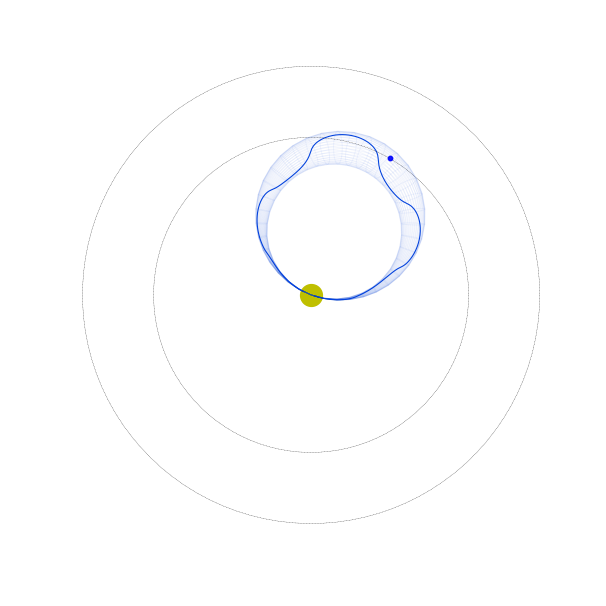

In [31]:
sns.set_context("talk")     

sns.set_style("ticks",{'grid.linestyle': '--'})
fsize=15

fig=plt.figure(1,figsize=(12,9),dpi=70)
ax = fig.add_subplot(111, projection='3d')

fp.plot_configure(ax, view_azim=0, view_elev=90, view_radius=0.8)

fp.plot_3dcore(ax, model_obj, tm0, color=c2)
fp.plot_3dcore_field(ax, model_obj, color=c2, step_size=0.005, lw=1.1, ls="-")
fp.plot_satellite(ax,satpos[66],color='blue',alpha=0.9)


# ax.plot([0,0.689],[0,0],[0,0],ls='-',color='black',lw=0.3)

fp.plot_circle(ax,0.689)
fp.plot_circle(ax,1.0)

plt.tight_layout()


#plt.savefig('results/initial_test.pdf')
#plt.savefig('initial_test.png', dpi=100)

ERROR


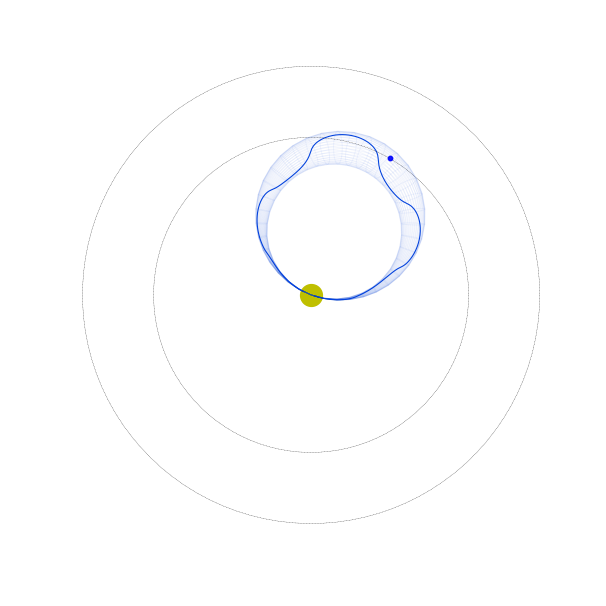

In [33]:

sns.set_style("ticks",{'grid.linestyle': '--'})
fsize=15

fig=plt.figure(1,figsize=(12,9),dpi=70)
ax = fig.add_subplot(111, projection='3d')

fp.plot_configure(ax, view_azim=0, view_elev=90, view_radius=0.8)

fp.plot_3dcore(ax, model_obj, tm0, color=c2)
fp.plot_3dcore_field(ax, model_obj, color=c2, step_size=0.005, lw=1.1, ls="-")
fp.plot_satellite(ax,satpos[66],color='blue',alpha=0.9)


# ax.plot([0,0.689],[0,0],[0,0],ls='-',color='black',lw=0.3)

fp.plot_circle(ax,0.689)
fp.plot_circle(ax,1.0)

plt.tight_layout()


#plt.savefig('results/initial_test.pdf')
#plt.savefig('initial_test.png', dpi=100)

In [ ]:
wf_arr=model_obj.visualize_shape(306, 30)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(*wf_arr.T)
ax.scatter(1,0,0)
ax.set_axis_off()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.view_init(elev=25, azim=35)